In [73]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

df=pd.read_csv('pima-indians-diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinThickness               768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DiabetesPedigreeFunction    768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [76]:
df.nunique()

Pregnancies                    17
Glucose                       136
BloodPressure                  47
SkinThickness                  51
Insulin                       186
BMI                           248
DiabetesPedigreeFunction      517
Age                            52
Outcome                         2
dtype: int64

In [77]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [79]:
X = df.drop(columns=['Outcome'])  
y = df['Outcome']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [81]:
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

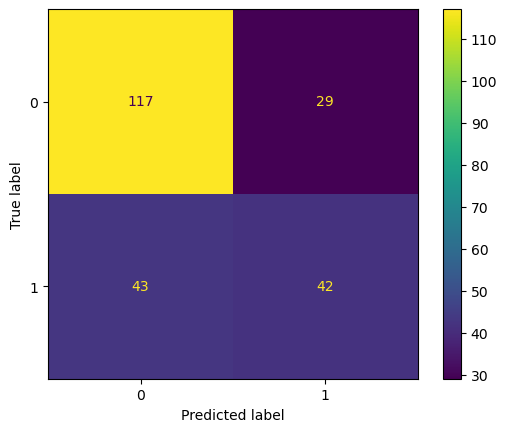

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


labels = ["0", "1"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
                        

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))
print("\nClassification Report:\n",metrics.classification_report(y_test,y_pred))

Accuracy: 0.6883116883116883
Precision: 0.5915492957746479
Recall: 0.49411764705882355
F1_Score: 0.5384615384615384

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76       146
           1       0.59      0.49      0.54        85

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.68       231



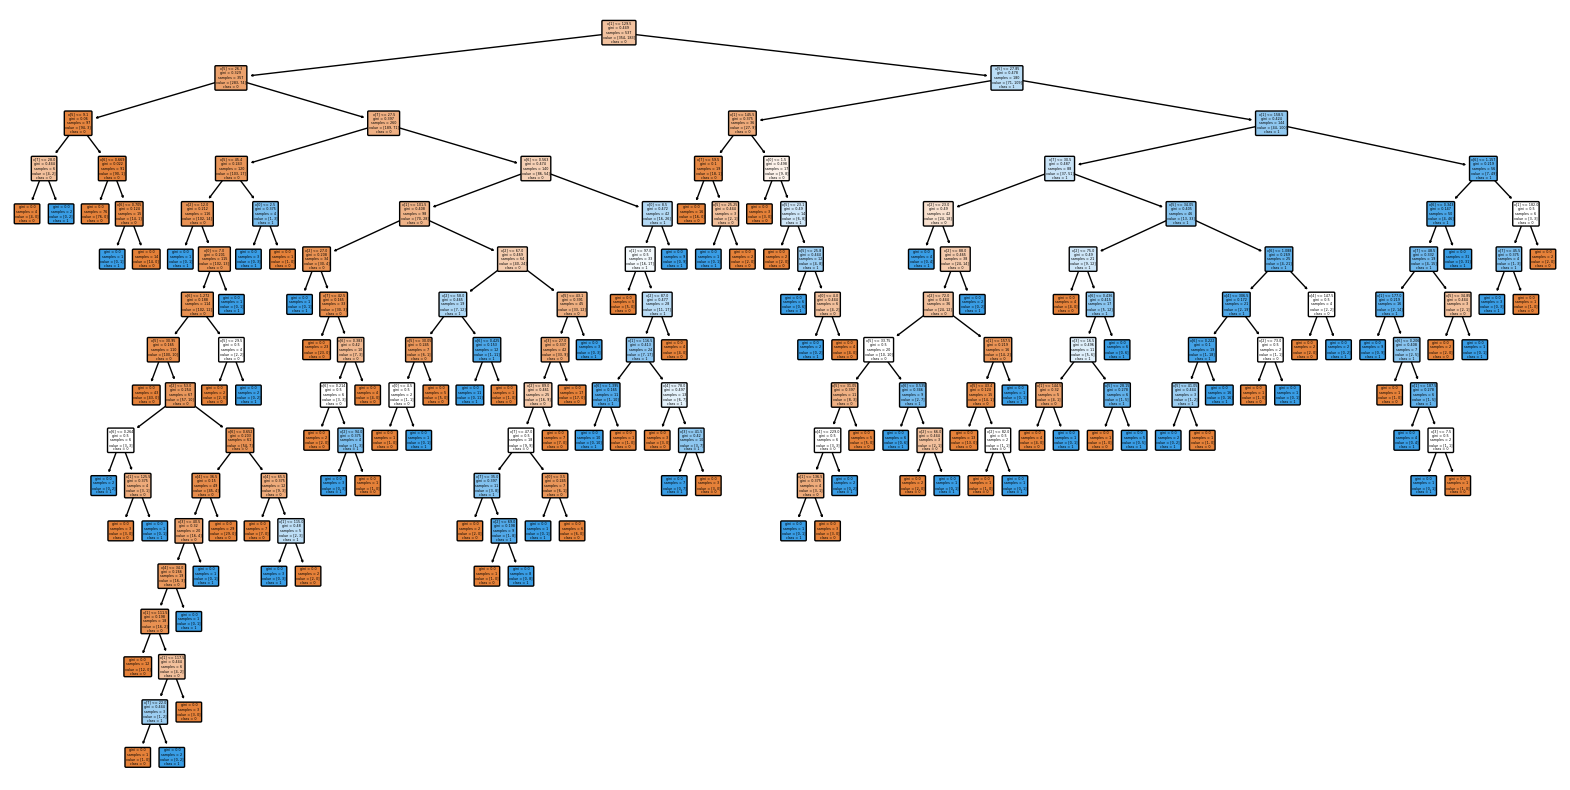

In [84]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [85]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


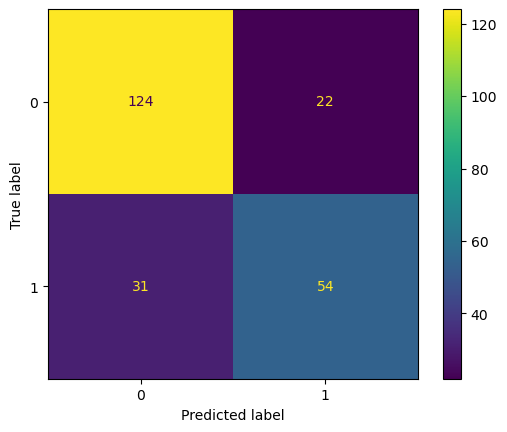

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


labels = ["0", "1"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
                        

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))
print("\nClassification Report:\n",metrics.classification_report(y_test,y_pred))

Accuracy: 0.7705627705627706
Precision: 0.7105263157894737
Recall: 0.6352941176470588
F1_Score: 0.6708074534161491

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



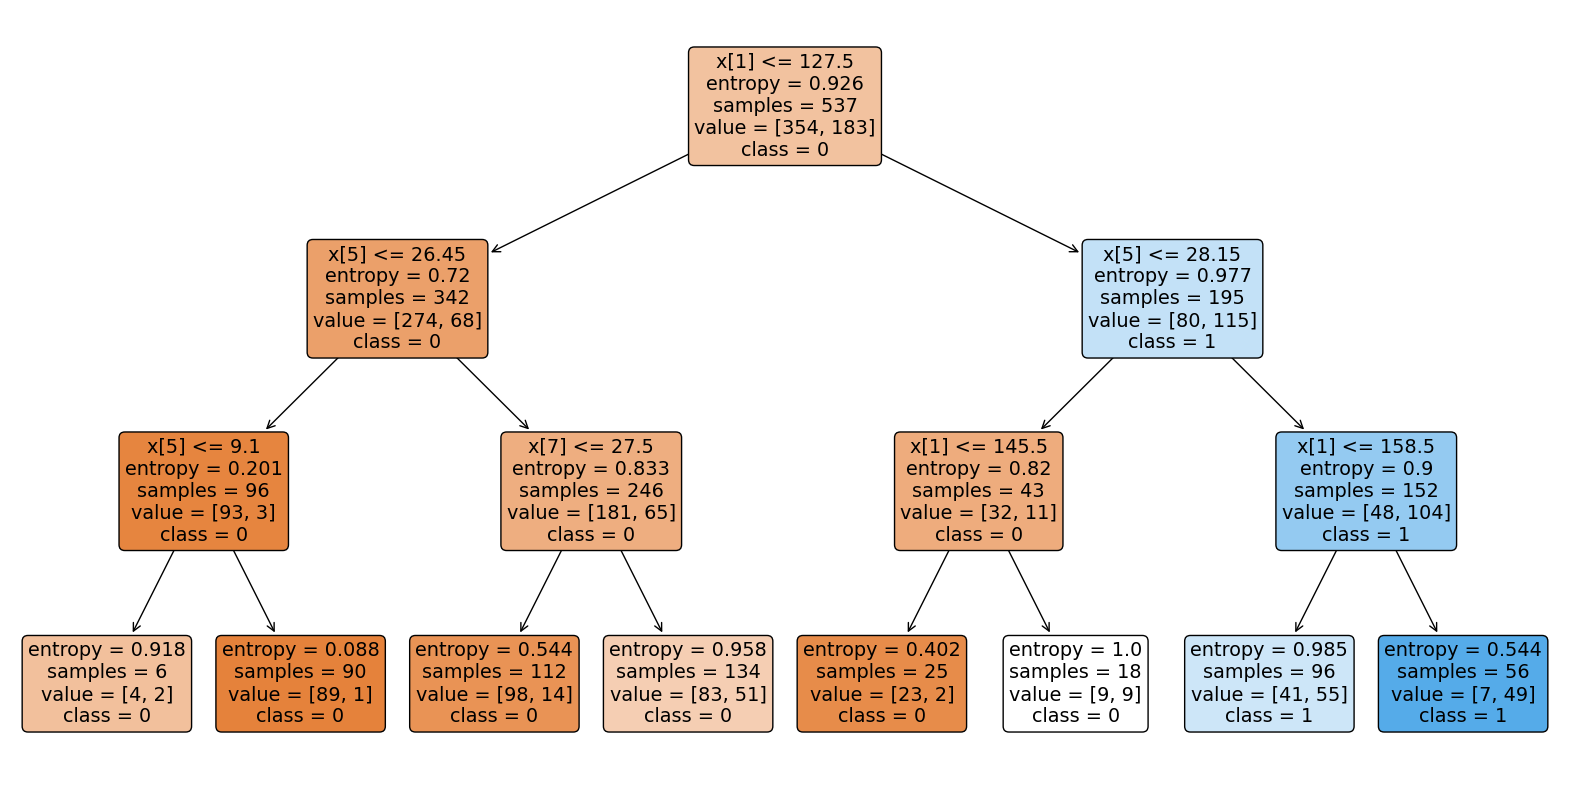

In [88]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, class_names=['0', '1'], filled=True, rounded=True)
plt.show()